# Библиотека PANDAS
### Киньябаева Аиша Иделевна

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

### Оценивание и штрафы

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%matplotlib inline  
# import almost all we need
import pandas as pd

Данные находятся в приложенном файле `chipotle.tsv`

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [4]:
file_path = 'chipotle.tsv'

data = pd.read_csv(file_path, sep='\t', engine ='python')
data.tail(10)

print("Количество строк:", len(data))
print("Столбцы:", data.columns)

Количество строк: 4622
Столбцы: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


#### 2.  Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [5]:
# количество заказов
num_orders = data['order_id'].nunique()

# уникальные категории товаров
num_unique_items = data['item_name'].nunique()

print(num_orders)
print(num_unique_items)

1834
50


#### 3. Есть ли в данных пропуски? В каких колонках? 

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

# пропуски в колонке choice_description

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [7]:
data = data.fillna(0)
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,0,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### 4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [8]:
print("Тип данных колонки 'item_price':", data['item_price'].dtype)

data['numeric_item_price'] = data['item_price'].apply(lambda x: float(x[1:]))

data.head()

Тип данных колонки 'item_price': object


,order_id,quantity,item_name,choice_description,item_price,numeric_item_price
0,1,1,Chips and Fresh Tomato Salsa,0,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


Какая средняя/минимальная/максимальная цена у товара? 

In [9]:
mean_price = data['numeric_item_price'].mean()

min_price = data['numeric_item_price'].min()

max_price = data['numeric_item_price'].max()

print("Средняя цена товара:", mean_price)
print("Минимальная цена товара:", min_price)
print("Максимальная цена товара:", max_price)

Средняя цена товара: 7.464335785374297
Минимальная цена товара: 1.09
Максимальная цена товара: 44.25


Удалите старую колонку с ценой.

In [10]:
data.drop(columns=['item_price'], inplace=True)
data.head()

,order_id,quantity,item_name,choice_description,numeric_item_price
0,1,1,Chips and Fresh Tomato Salsa,0,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [11]:
# Самые дорогие товары:
data.drop_duplicates()
data.sort_values(by = ['item_name'])
data.nlargest(5, columns = 'numeric_item_price')

,order_id,quantity,item_name,choice_description,numeric_item_price
3598,1443,15,Chips and Fresh Tomato Salsa,0,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75


In [12]:
# Самые дешевые товары:
data.drop_duplicates()
data.sort_values(by = ['item_name'])
data.nsmallest(5, columns = 'numeric_item_price')

,order_id,quantity,item_name,choice_description,numeric_item_price
28,14,1,Canned Soda,[Dr. Pepper],1.09
34,17,1,Bottled Water,0,1.09
53,24,1,Canned Soda,[Sprite],1.09
87,38,1,Bottled Water,0,1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09


#### 6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [13]:
chicken_bowl_orders = data[data['item_name'] == 'Chicken Bowl']

more_than_one_chicken_bowl_orders = chicken_bowl_orders[chicken_bowl_orders['quantity'] > 1]
num_orders_more_than_one_chicken_bowl = len(more_than_one_chicken_bowl_orders)

print(num_orders_more_than_one_chicken_bowl)

33


#### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [14]:
average_order_price = data.groupby('order_id')['numeric_item_price'].sum().mean()

average_order_quantity = data.groupby('order_id')['quantity'].sum().mean()

print("Средний чек у заказа:", average_order_price)
print("Среднее количество товаров в заказе:", average_order_quantity)

Средний чек у заказа: 18.811428571428568
Среднее количество товаров в заказе: 2.711014176663032


#### 8. Сколько заказов содержали ровно 1 товар?

In [15]:
orders_quantity = data.groupby('order_id')['quantity'].sum()

num_orders_with_one_item = (orders_quantity == 1).sum()

print("Количество заказов, содержащих ровно 1 товар:", num_orders_with_one_item)

Количество заказов, содержащих ровно 1 товар: 56


#### 9. Какая самая популярная категория товара? 

In [16]:
popular_category = data.groupby('item_name')['quantity'].sum().idxmax()

print("Самая популярная категория товара:", popular_category)

Самая популярная категория товара: Chicken Bowl


#### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [17]:
burrito_data = data[data['item_name'].str.contains('Burrito')]

burrito_types = burrito_data['item_name'].unique()

print("Виды Burrito:", burrito_types)

burrito_sales = burrito_data.groupby('item_name')['quantity'].sum()

most_popular_burrito = burrito_sales.idxmax()
print("Самый популярный вид Burrito:", most_popular_burrito)

most_expensive_burrito = burrito_data.groupby('item_name')['numeric_item_price'].mean().idxmax()
print("Самый дорогой вид Burrito:", most_expensive_burrito)


Виды Burrito: ['Steak Burrito' 'Chicken Burrito' 'Barbacoa Burrito' 'Carnitas Burrito'
 'Veggie Burrito' 'Burrito']
Самый популярный вид Burrito: Chicken Burrito
Самый дорогой вид Burrito: Steak Burrito


#### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [18]:
average_order_cost = data.groupby('order_id')['numeric_item_price'].sum().mean()

data_with_average_cost = data.merge(data.groupby('order_id')['numeric_item_price'].sum().reset_index().rename(columns={'numeric_item_price': 'order_cost'}), on='order_id')

items_over_40_percent = data_with_average_cost[data_with_average_cost['numeric_item_price'] > 0.4 * data_with_average_cost['order_cost']]

num_orders_with_items_over_40_percent = items_over_40_percent['order_id'].nunique()

print("Количество заказов, в которых есть товары, стоимость которых превышает 40% от суммы всего чека:", num_orders_with_items_over_40_percent)


Количество заказов, в которых есть товары, стоимость которых превышает 40% от суммы всего чека: 1624


#### 12. Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [19]:
data.loc[data['item_name'] == 'Diet Coke', 'numeric_item_price'] += 1.35 - 1.25

revenue_before = (data['numeric_item_price'] * data['quantity']).sum()

revenue_after = (data['numeric_item_price'] * data['quantity']).sum()

percent_increase = ((revenue_after - revenue_before) / revenue_before) * 100

print("Процент увеличения выручки от товара Diet Coke:", percent_increase)


Процент увеличения выручки от товара Diet Coke: 0.0


#### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [20]:
import numpy as np

df = np.random.rand(10, 4)
newdf = pd.DataFrame(df[:,1:],columns=['index', 'column1','column2'])
newdf.set_index("index")

,column1,column2
index,,
0.735958,0.007487,0.734060
0.412701,0.255578,0.327043
0.971292,0.064617,0.073776
0.491633,0.603227,0.612304
0.365144,0.406729,0.178263
0.559025,0.447832,0.760038
0.972034,0.934113,0.449078
0.756657,0.080219,0.834570
0.866229,0.018132,0.722113


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [21]:
newdf.to_csv('new_data.csv', index = False, header = False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [22]:
%matplotlib inline
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [23]:
import datetime
import random

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(data.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
data['date'] = data.order_id.map(dates['date'])
data

,order_id,quantity,item_name,choice_description,numeric_item_price,date
0,1,1,Chips and Fresh Tomato Salsa,0,2.39,2018-01-04
1,1,1,Izze,[Clementine],3.39,2018-01-04
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-04
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,2.39,2018-01-04
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-25
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-27
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-27
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-10
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-10


#### 14. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

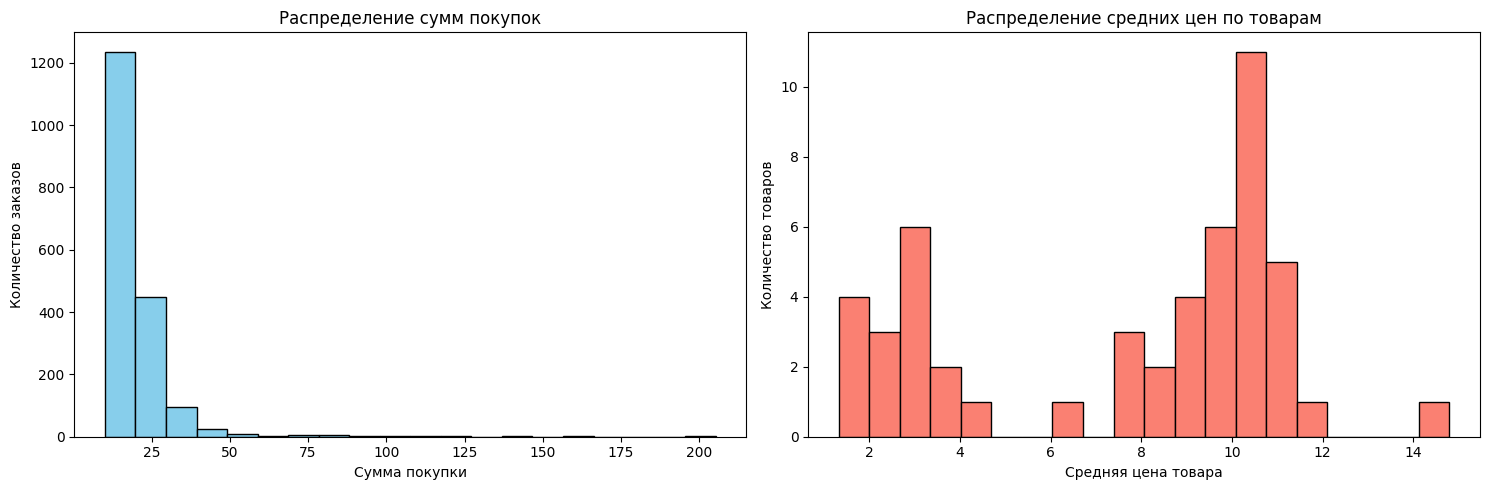

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Гистограмма распределения сумм покупок
axes[0].hist(data.groupby('order_id')['numeric_item_price'].sum(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Распределение сумм покупок')
axes[0].set_xlabel('Сумма покупки')
axes[0].set_ylabel('Количество заказов')

# Гистограмма средних цен отдельных видов продуктов item_name
average_prices = data.groupby('item_name')['numeric_item_price'].mean()
axes[1].hist(average_prices, bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Распределение средних цен по товарам')
axes[1].set_xlabel('Средняя цена товара')
axes[1].set_ylabel('Количество товаров')

plt.tight_layout()
plt.show()


#### 15. Постройте график зависимости суммы покупок от дней.

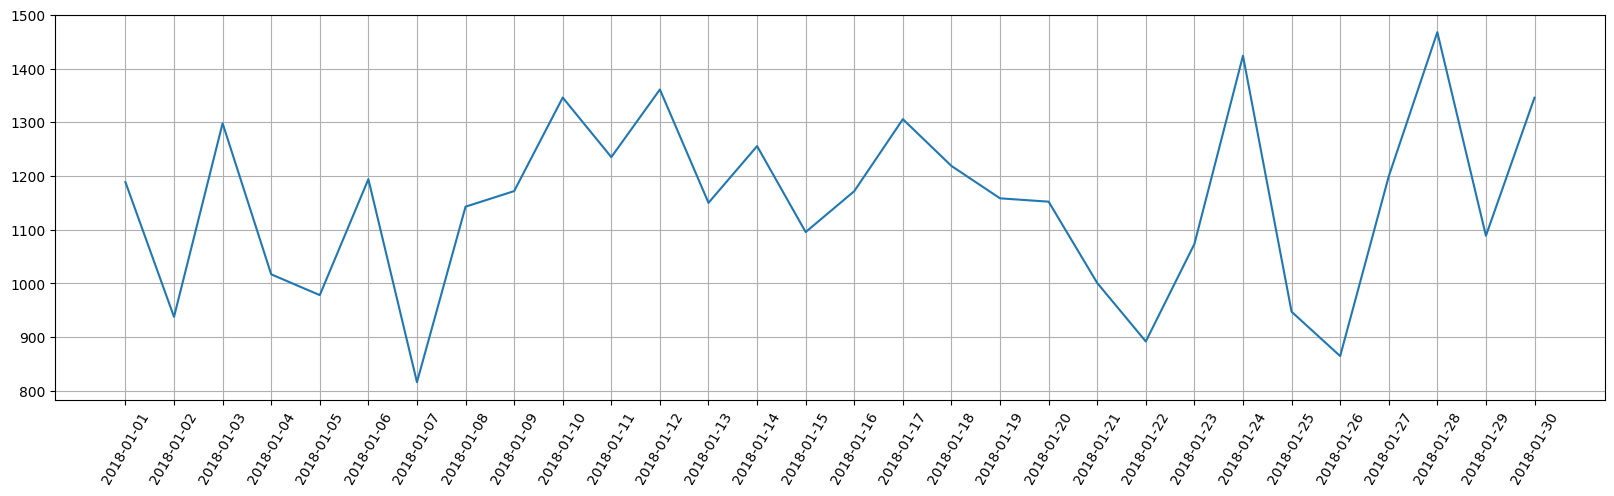

In [25]:
plt.figure(figsize=(20, 5))
order_sums = data.groupby('date')['numeric_item_price'].sum()
date = data.drop_duplicates('date')['date'].sort_values()
plt.plot(date.values, order_sums.values) 
axes[0].set_xlabel('день')
axes[0].set_ylabel('сумма заказа')
axes[0].set_title('зависимость суммы покупок от дней')
plt.grid()
plt.xticks(rotation=60)
plt.show()

#### 16. Постройте средних сумм покупок по дням недели (bar plot).

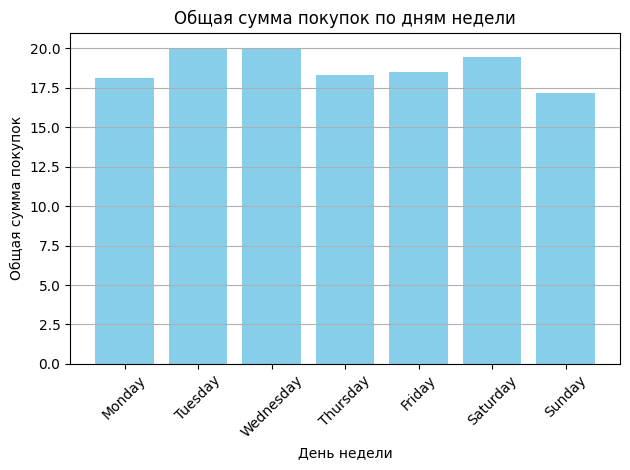

In [26]:
data['weekday'] = pd.to_datetime(data['date']).apply(lambda x: x.weekday())

order_data = data.groupby('order_id')['numeric_item_price'].sum()
data['full_order_price'] = order_data[data['order_id']].values

weekday_sums = data.drop_duplicates('order_id').groupby('weekday')['full_order_price'].mean()

plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], weekday_sums.values, color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Общая сумма покупок')
plt.title('Общая сумма покупок по дням недели')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 17. Постройте график зависимости денег за товар от купленного количества (scatter plot).

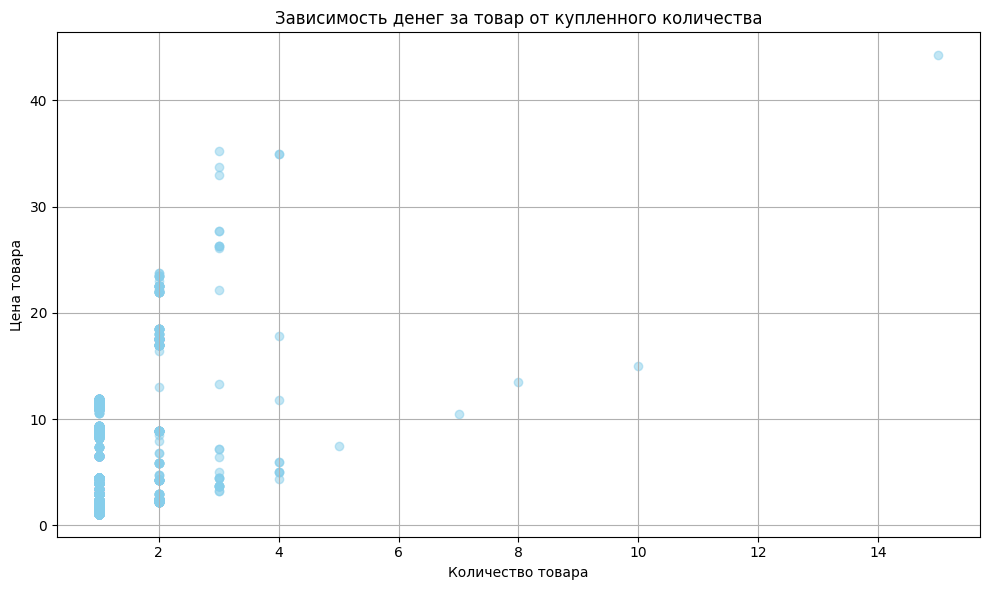

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['quantity'], data['numeric_item_price'], color='skyblue', alpha=0.5)
plt.title('Зависимость денег за товар от купленного количества')
plt.xlabel('Количество товара')
plt.ylabel('Цена товара')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 18. Сохраните график в формате pdf (так он останется векторизованным).

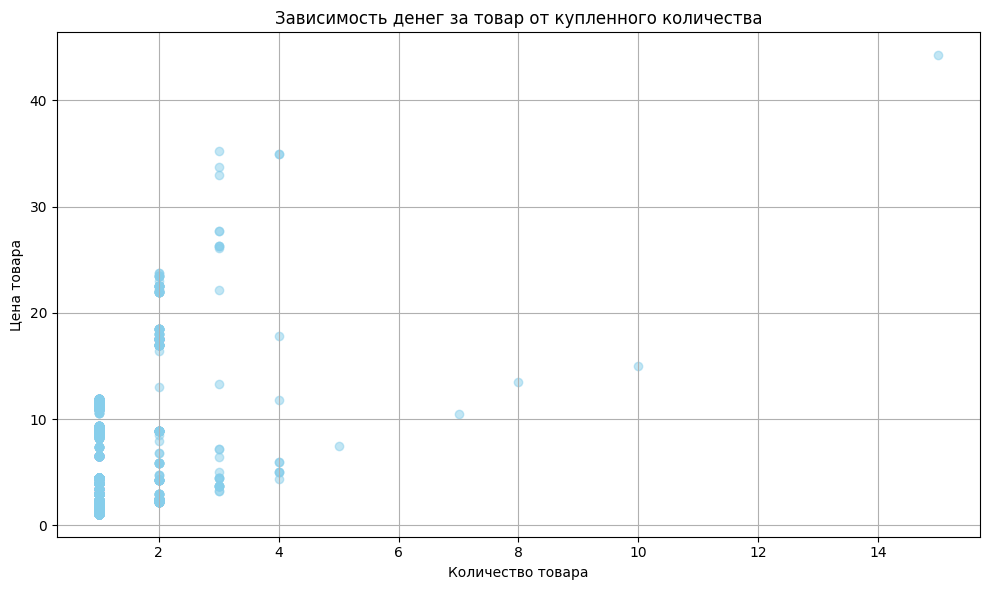

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['quantity'], data['numeric_item_price'], color='skyblue', alpha=0.5)
plt.title('Зависимость денег за товар от купленного количества')
plt.xlabel('Количество товара')
plt.ylabel('Цена товара')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot.pdf')

Большинство задания было сделано при помощи стандартной библиотеки.

А так же, при помощи подсказок одного программиста, но в остальном делала сама.